In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sympy import *
import scipy.linalg as la

### Question 1:  Matrices and Systems of Linear Equations
Given the following matrices
$$A = \begin{bmatrix} 0 & -1 & 2 \\ -20 & -1 & 4 \\ -2 & 7 & -3 \end{bmatrix}$$

$$B = \begin{bmatrix} -7 & 1 & 1 \\ 7 & -3 & -2 \\ 3 & 5 & 0 \end{bmatrix}$$

Solve for C given $$C = A*B $$

In [24]:
A = np.matrix([[0,-1,2],
            [-20,-1,4],
            [-2,7,-3]])
A

matrix([[  0,  -1,   2],
        [-20,  -1,   4],
        [ -2,   7,  -3]])

In [25]:
B = np.matrix([[-7,1,1],
             [7,-3,-2],
             [3,5,0]])
B

matrix([[-7,  1,  1],
        [ 7, -3, -2],
        [ 3,  5,  0]])

In [23]:
C = A*B
C

matrix([[ -1,  13,   2],
        [145,   3, -18],
        [ 54, -38, -16]])

Part 2. Solve the equation $$C x =y$$

In [26]:
C_inv = la.inv(C)
C_inv

array([[-0.10590278,  0.01909722, -0.03472222],
       [ 0.19502315, -0.01331019,  0.03935185],
       [-0.82060185,  0.09606481, -0.27314815]])

In [33]:
y = np.matrix([[1],
              [-1],
              [2]])
y

matrix([[ 1],
        [-1],
        [ 2]])

In [35]:
x = np.dot(C_inv, y)
x

matrix([[-0.19444444],
        [ 0.28703704],
        [-1.46296296]])

### Question 2: Estimating some simple Keynesian consumption functions

The Excel file US data.xls contains data on aggregate consumption (Ct), income (Yt), and the interest rate (rt) for the U.S. economy. All variables are nominal, quarterly, and span the period 1960Q1-2019Q3.

a) Import the data using Pandas

In [290]:
data = pd.read_csv('US_data.csv')

In [399]:
data = data.rename(columns= {'observation_date':'Date', "PCEC": 'Consumption',
                            'GDP': 'GDP', 'IRLTLT01USQ156N': 'Interest Rate'} )
data

,Date,Consumption,GDP,Interest Rate
0,1960-01-01,326.36,542.65,4.49
1,1960-04-01,332.21,541.08,4.26
2,1960-07-01,332.13,545.60,3.83
3,1960-10-01,334.02,540.20,3.89
4,1961-01-01,334.52,545.02,3.79
...,...,...,...,...
234,2018-07-01,14114.56,20749.75,2.93
235,2018-10-01,14211.92,20897.80,3.03
236,2019-01-01,14266.25,21098.83,2.65
237,2019-04-01,14511.18,21340.27,2.33


(b) Plot the three series on the same graph.

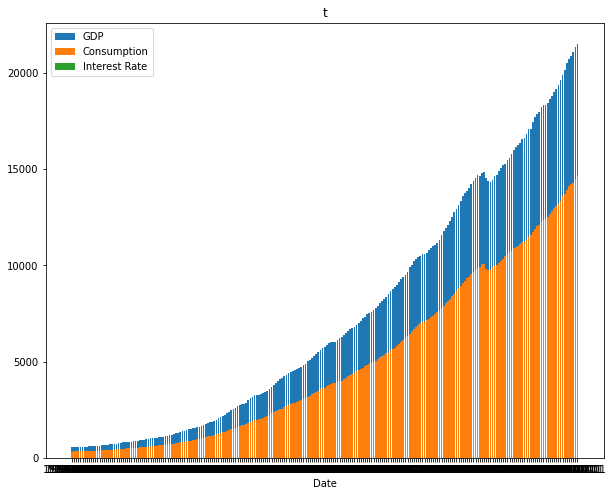

In [306]:
#Plotting the three series
f, ax = plt.subplots(figsize = (10,8))

plt.bar(x = data['Date'], height = data['GDP'], label = 'GDP')
plt.bar(x = data['Date'], height = data['Consumption'], label = 'Consumption')
plt.bar(x = data['Date'], height = data['Interest Rate'], label = 'Interest Rate')
plt.title('GDP, Investment and Interest Rate')
plt.xlabel('Date')
plt.legend()
plt.show()

Because of the different scales of our data when plotting all three on the same graph we are not able to see the interest rate series. However for Consumption and GDP we can see a gradual uptrend as the time progresses. 

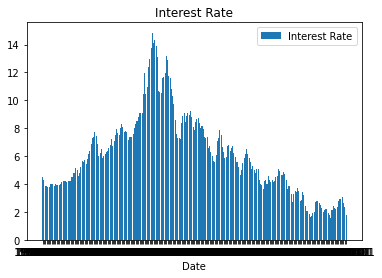

In [528]:
# Here is a seperate plot of the interest rate so we can get a better appoximation

plt.bar(x = data['Date'], height = data['Interest Rate'], label = 'Interest Rate')
plt.title('Interest Rate')
plt.xlabel('Date')
plt.legend()
plt.show()

(c) Using only matrix operations, compute the OLS (point) estimates for these two (nested) models:

$$Ct = α0 + α1Yt + t$$

$$Ct = β0 + β1Yt + β2rt + εt$$

First $$Ct = α0 + α1Yt + t$$

In [481]:
Y = data['Consumption']
X = data['GDP']

# Creating the matrix X which has a column of ones and a column of 
X = np.vstack([X, np.ones(len(X))]).T

Finding $$\hat{B} = (X'X)^{-1} X'Y$$

In [446]:
beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
beta

array([   0.68487276, -167.1292038 ])

The first number represents the slope and the second number represents the y intercept

Finding $$\hat{Y} = X\hat{B}$$

In [447]:
y_hat = np.dot(X,beta)

In [448]:
# Finding y_bar

y_bar = np.mean(Y)
y_bar

4899.165556485355

Now we need to calculate $R^{2}$. To do that we need to find SST and SSR
$$SST = \sum\limits_{i=1}^{n}(y_{i} - \bar{y})^{2}$$
$$SSR = \sum\limits_{i=1}^{n}(\hat{y}_{i} - \bar{y})^{2}$$
$$R^{2} = SSR/SST$$

In [449]:
SSR = np.sum((y_hat-y_bar)**2)
SSR

4308198791.755816

In [450]:
SST = np.sum((Y-y_bar)**2)
SST

4310095256.307289

In [451]:
R_2 = SSR/SST
R_2

0.9995599947475181

In [462]:
# Creating a DataFrame to load our answers into
r_2_table = pd.DataFrame(columns = ['Equation', 'R2'])
r_2_table = r_2_table.append({'Equation' :'1', 'R2':R_2}, ignore_index=True)

Next $$Ct = β0 + β1Yt + β2rt + εt$$

In [453]:
r = data['Interest Rate']
Y = data['Consumption']
X = data['GDP']

X = np.vstack([X, r, np.ones(len(X))]).T

Finding $$\hat{β} = (X'X)^-1 X'Y$$

In [454]:
beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
beta

array([  0.67807397, -25.29811167,  36.64662999])

Finding $$\hat{Y} = X\hat{B}$$

In [455]:
y_hat = np.dot(X,beta)

As before,  we need to calculate $R^{2}$. To do that we need to find SST and SSR
$$SST = \sum\limits_{i=1}^{n}(y_{i} - \bar{y})^{2}$$
$$SSR = \sum\limits_{i=1}^{n}(\hat{y}_{i} - \bar{y})^{2}$$
$$R^{2} = SSR/SST$$

In [456]:
SSR = np.sum((y_hat-y_bar)**2)
SSR

4309024564.952015

In [457]:
SST = np.sum((Y-y_bar)**2)
SST

4310095256.307289

R_2 = SSR/SST
R_2
r_2_table = r_2_table.append({'Equation' :'2', 'R2':R_2}, ignore_index=True)

In [464]:
r_2_table

,Equation,R2
0,1,1.00
1,2,1.00


$R^{2}$ should be between 0 and 1. Because the R value I am getting is equal to 1 this tells us that our model is doing a good job at fitting the data.

(d) Re-do part c, considering the following modification (rather than using consumption and income in levels, we consider their log transformation):
$$lnCt = α0 + α1lnYt + t$$
$$lnCt = β0 + β1lnYt + β2rt + εt$$

Starting with $$lnCt = α0 + α1lnYt + t$$

In [499]:
ln_X = np.log(data['Consumption'])
ln_Y = np.log(data['GDP'])

X = np.vstack([ln_X, np.ones(len(ln_X))]).T

Finding $$\hat{B} = (X'X)^{-1} X'Y$$

In [500]:
beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, ln_Y))
beta

array([0.9599205 , 0.77067186])

Finding $$\hat{Y} = X\hat{B}$$

In [501]:
y_hat = np.dot(X,beta)

In [502]:
# Finding y_bar

y_bar = np.mean(ln_Y)
y_bar

8.400834632673812

In [503]:
SSR = np.sum((y_hat-y_bar)**2)
SSR

308.74851788043463

In [504]:
SST = np.sum((ln_Y-y_bar)**2)
SST

308.80555827478497

In [505]:
R_2 = SSR/SST
R_2

0.9998152870218108

In [518]:
r_2_ln_table = pd.DataFrame(columns = ['Equation', 'R2'])
r_2_ln_table = r_2_ln_table.append({'Equation' :'1', 'R2':R_2}, ignore_index=True)

Next $$lnCt = β0 + β1lnYt + β2rt + εt$$

In [519]:
ln_r = np.log(data['Interest Rate'])
ln_X = np.log(data['Consumption'])
ln_Y = np.log(data['GDP'])

X = np.vstack([ln_X, ln_r, np.ones(len(ln_X))]).T

Finding $$\hat{B} = (X'X)^{-1} X'Y$$

In [520]:
beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, ln_Y))
beta

array([0.96381002, 0.02327403, 0.70051106])

Finding $$\hat{Y} = X\hat{B}$$

In [521]:
y_hat = np.dot(X,beta)

In [522]:
SSR = np.sum((y_hat-y_bar)**2)
SSR

308.77573992684313

In [523]:
SST = np.sum((ln_Y-y_bar)**2)
SST

308.80555827478497

In [524]:
R_2 = SSR/SST
R_2

0.999903439730462

In [525]:
r_2_ln_table = r_2_ln_table.append({'Equation' :'2', 'R2':R_2}, ignore_index=True)

In [526]:
r_2_ln_table

,Equation,R2
0,1,1.00
1,2,1.00


Again we are getting that R^2 is equal to 1 in both instances, which would mean the estimate is a perfect fit to the data

### Question 3: An IS-LM-FE Mode

Consider the general IS-LM model for a closed economy that we discussed in class. To start with, all the parameters are kept at their benchmark values: c = 0.63, b = 1500, k = 0.6, h = 2700, C = 55, I = 75, G = 200, T = 110, M = 200, P = 1.

#### Endogenous variables: 

- product, $Y$;
- consumption, $C$; 
- investment, $I$; 
- interest rate, $r$.

In [40]:
Y, C, I, r = symbols('Y C I r')

#### Exogenous variables: 

- government/public spending, $\bar G$; 
- independent/autonomous consumption, $\bar C$; 
- independent/autonomous investment, $\bar I$; 
- income taxes, $\bar T$;
- money supply, $\bar M$; 
- price level (fixed), $\bar P$.

In [43]:
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = symbols('Gbar Cbar Ibar Tbar Mbar Pbar')

#### Parameters:

- $c$ is the propensity to consume, $0 < c < 1$; 
- $b > 0$ is the interest sensitivity of investment; 
- $k > 0$ is the output sensitivity of the demand for money; 
- $h > 0$ is the interest sensitivity of the demand for money.

In [45]:
c, b, k, h = symbols('c b k h', positive = True)

In [174]:
# Creating a dataframe to load our values into later

df_a = pd.DataFrame(columns = ['Title', 'Sensitivity of Investment to Intest Rate', 'Product', 'Consumption', 'Investment', 'Interest Rate'])

pd.options.display.float_format = '{:.2f}'.format

In [175]:
def ISLM(newTitle, new_b=1500):
 
    #Parameters 
    c = 0.63 #marginal propensity to consume
    b = new_b #sensitivity of the investment to the interest rate 
    k = 0.6  #sensitivity of the money demand to income 
    h = 2700 #sensitivity of the money demand to the interest rate
    
    #Matrix representation of the model : Ax=d 
    # A, coefficient matrix for [Y, C, I, r]
    A = np.matrix([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, 0], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr    
    
    #Policy exogenous variables 
    C_bar = 55 # autonomous consumption 
    I_bar = 75 # autonomous investment 
    G_bar = 200 #government spending 
    T_bar = 110 # tax on income 
    M_bar = 200 # money supply 
    P_bar = 1 #price level ( fixed in the short−run )
    
    # x = [Y,C,I,r] , vector of the endogeneous variables 
    # d, vector of the exogenous variables
    d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )
    
    #Compute the endogenous variables 
    new_x = sp.linalg.solve(A, d)

    print(" IS-LM model: closed economy")    
    print("-----------------------------------------------------------")
    print("exogenous variables:")
    print("G = {0:.0f}; T = {1:.0f}; M = {2:.0f}; P = 1".format(G_bar,T_bar,M_bar))
    print("product, Y = {:.2f}, ".format(new_x[0]))
    print("consumption, C = {:.2f}, ".format(new_x[1]))
    print("investment, I = {:.2f}，".format(new_x[2]))
    print("interest rate (%), r = {:.2f} ".format(new_x[3]*100))
    print(" IS-LM model: closed economy")


    return b, new_x

In [176]:
# Calling our default function and loading the results into the dataframe

b, new_x = ISLM(newTitle= r'Default')

df_a = df_a.append({'Title':'Default', 'Sensitivity of Investment to Intest Rate': b, 'Product':new_x[0], 'Consumption':new_x[1], 
                    'Investment': new_x[2], 'Interest Rate':new_x[3]*100}, ignore_index=True)

 IS-LM model: closed economy
-----------------------------------------------------------
exogenous variables:
G = 200; T = 110; M = 200; P = 1
product, Y = 528.64, 
consumption, C = 318.74, 
investment, I = 9.90，
interest rate (%), r = 4.34 
 IS-LM model: closed economy


In [177]:
# Calling our function again and getting results for Low Sensitivity of investment to interest rate
# and then loading the data into the table

b, new_x = ISLM(newTitle= r'Low Sensitivity of investment to interest rate', new_b=1000)

df = df.append({'Title':'Low', 'Sensitivity of Investment to Intest Rate': b, 'Product':new_x[0], 'Consumption':new_x[1], 
                    'Investment': new_x[2], 'Interest Rate':new_x[3]*100}, ignore_index=True)

 IS-LM model: closed economy
-----------------------------------------------------------
exogenous variables:
G = 200; T = 110; M = 200; P = 1
product, Y = 565.28, 
consumption, C = 341.83, 
investment, I = 23.46，
interest rate (%), r = 5.15 
 IS-LM model: closed economy


In [178]:
# Calling our function and getting results for High Sensitivity of investment to interest rate
# and then loading the data into the table



b, new_x = ISLM(newTitle= r'High Sensitivity of investment to interest rate',
     new_b=2000)

df_a = df_a.append({'Title':'High', 'Sensitivity of Investment to Intest Rate': b, 'Product':new_x[0], 'Consumption':new_x[1], 
                    'Investment': new_x[2], 'Interest Rate':new_x[3]*100}, ignore_index=True)

 IS-LM model: closed economy
-----------------------------------------------------------
exogenous variables:
G = 200; T = 110; M = 200; P = 1
product, Y = 502.00, 
consumption, C = 301.96, 
investment, I = 0.04，
interest rate (%), r = 3.75 
 IS-LM model: closed economy


In [179]:
df_a

,Title,Sensitivity of Investment to Intest Rate,Product,Consumption,Investment,Interest Rate
0,Default,1500,528.64,318.74,9.90,4.34
1,Low,1000,565.28,341.83,23.46,5.15
2,High,2000,502.00,301.96,0.04,3.75


Decreasing the sensitivity of invesment to interest rate leads to a increase in all four paramaters, whereas, increasing the sensitivity of investment to the interest rate leads to a decrease in all four parameters shown above.

I think the bigget change just by looking at the table above is Invesment. Increasing or decreasing the sensitivity of investment leads to large changes in the amount of investment. The interest rate and consumtion are bothreasonably estimated. A standard yearly interest rate is usually between 3-5% and in all the cases above consumption is about 60% of GDP which is standard in real world. However, the model does not provide a realistic determination of investment. All the investment numbers provided above are approximetly 2-4% of GDP when it the real world that number should be more like 20%.

#### b)

For the case with the low sensitivity of investment to the interest rate (bL = 1000), analyze the role of fiscal and monetary policies. Study two cases: in one case there is a fiscal austerity policy with Gnew = 180, while in the other one there is a reduction in the money supply with Mnew = 180. In two separate figures, plot the IS and LM curves before and after the policy changes. In a Table, report the values of GDP, Consumption, Investment and the interest rate.

In [268]:
# Creating a new datafram for part b to load our results into.

df_b = pd.DataFrame(columns = ['Change', 'GDP', 'Consumption', 'Investment', 'Interest Rate'])

pd.options.display.float_format = '{:.2f}'.format

In [269]:
def ISLM(title, b_low, new_G_bar = 200, new_M_bar=200):

    #Parameters 
    c = 0.63 #marginal propensity to consume
    b = b_low #sensitivity of the investment to the interest rate 
    k = 0.6  #sensitivity of the money demand to income 
    h = 2700 #sensitivity of the money demand to the interest rate
    
    #Matrix representation of the model : Ax=d 
    # A, coefficient matrix for [Y, C, I, r]
    A = np.matrix([ [1, -1, -1, 0], # Y=C+I+G 
     [-c, 1, 0, 0], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−br 
     [k, 0, 0, -h] ]) # M/P=kY−hr    
    
    #Policy exogenous variables 
    C_bar = 55 # autonomous consumption 
    I_bar = 75 # autonomous investment 
    G_bar = 200 #government spending 
    T_bar = 110 # tax on income 
    M_bar = 200 # money supply 
    P_bar = 1 #price level ( fixed in the short−run )

    #Policy shocks
    G_bar = new_G_bar #government spending 
    M_bar = new_M_bar # money supply 

    # x = [Y,C,I,r] , vector of the endogeneous variables 
    # d, vector of the exogenous variables
    d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )
    
    #Compute the endogenous variables 
    new_x = sp.linalg.solve(A, d)

    print(" IS-LM model: closed economy")    
    print("-----------------------------------------------------------")
    print("Changes: ",title)
    print("exogenous variables:")
    print("G = {0:.0f}; T = {1:.0f}; M = {2:.0f}; P = 1".format(new_G_bar,T_bar,new_M_bar))
    print("product, Y = {:.2f}, ".format(new_x[0]))
    print("consumption, C = {:.2f}, ".format(new_x[1]))
    print("investment, I = {:.2f}，".format(new_x[2]))
    print("interest rate (%), r = {:.2f} ".format(new_x[3]*100))
    print(" IS-LM model: closed economy")

    #Plot the solution: IS−LM diagram

    #Generate a grid on Y; in this case, since this is a line, only 2 points would have been enough
    new_Y = np.linspace(0.95*new_x[0],1.05*new_x[0], num=100) 

    # IS: I=Y−C−G and I=I_bar−br expressed in terms of r
    new_C = C_bar+c*(new_Y-T_bar ) 
    new_I =new_Y-new_C-G_bar 
    new_IS=( I_bar-new_I ) / b  

    # LM: M_bar/P_bar=kY−hr expressed in terms of r
    new_LM = 1/h*( k*new_Y-M_bar / P_bar ) 
    
    return new_Y, new_IS, new_LM, new_x

In [270]:
# calling our function and getting the results for the default, and then loading into dataframe

Y, default_IS, default_LM, new_x = ISLM(title= r'Default', b_low = 1000)

df_b = df_b.append({'Change':'Default', 'GDP':new_x[0], 'Consumption':new_x[1], 
                    'Investment': new_x[2], 'Interest Rate':new_x[3]*100}, ignore_index=True)

 IS-LM model: closed economy
-----------------------------------------------------------
Changes:  Default
exogenous variables:
G = 200; T = 110; M = 200; P = 1
product, Y = 565.28, 
consumption, C = 341.83, 
investment, I = 23.46，
interest rate (%), r = 5.15 
 IS-LM model: closed economy


In [271]:
# calling our function and getting the results for a reduction in Gov spenind
# and then loading into dataframe

new_Y, new_G_IS, new_G_LM, new_x = ISLM(title= r'Reduction in Government Spending', b_low = 1000, new_G_bar = 180)

df_b = df_b.append({'Change':'Reduction in Gov. Spending', 'GDP':new_x[0], 'Consumption':new_x[1], 
                    'Investment': new_x[2], 'Interest Rate':new_x[3]*100}, ignore_index=True)

 IS-LM model: closed economy
-----------------------------------------------------------
Changes:  Reduction in Government Spending
exogenous variables:
G = 180; T = 110; M = 200; P = 1
product, Y = 531.51, 
consumption, C = 320.55, 
investment, I = 30.96，
interest rate (%), r = 4.40 
 IS-LM model: closed economy


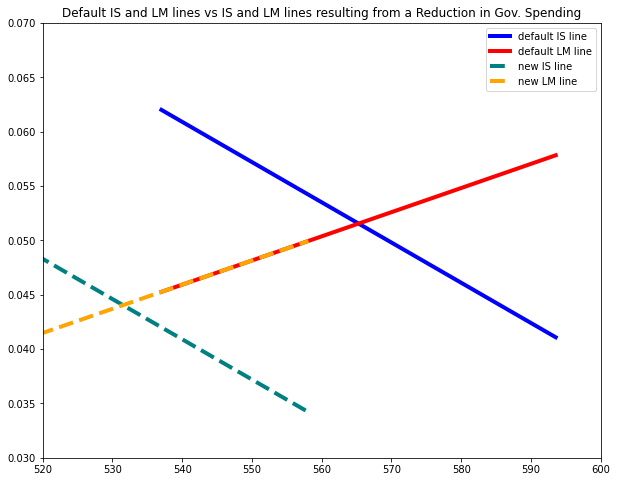

In [272]:
# Plotting the results from the default IS and LM line versus the IS and LM lines resulting
# from a reduction in Gov. Spending

plt.figure(figsize = (10,8))
l1 = plt.plot(Y, default_IS , 'blue', linewidth=4.0, label='default IS line')
l2 = plt.plot(Y, default_LM,  color='red', linewidth=4.0, label='default LM line')
l1 = plt.plot(new_Y, new_G_IS , 'teal', linewidth=4.0, linestyle='--', label='new IS line')
l2 = plt.plot(new_Y, new_G_LM,  color='orange', linewidth=4.0, linestyle='--', label='new LM line')
plt.xlim((520, 600))
plt.ylim((0.03, 0.07))
plt.legend(loc = 'best')
plt.title('Default IS and LM lines vs IS and LM lines resulting from a Reduction in Gov. Spending')
plt.show()

In [273]:
# calling our function and getting the results for a reduction in Money Supply
# and then loading into dataframe

new_Y, new_M_IS, new_M_LM, new_x = ISLM(title= r'Reduction in Money Supply', b_low = 1000, new_M_bar = 180)

df_b = df_b.append({'Change':'Reduction in Money Supply', 'GDP':new_x[0], 'Consumption':new_x[1], 
                    'Investment': new_x[2], 'Interest Rate':new_x[3]*100}, ignore_index=True)

 IS-LM model: closed economy
-----------------------------------------------------------
Changes:  Reduction in Money Supply
exogenous variables:
G = 200; T = 110; M = 180; P = 1
product, Y = 552.78, 
consumption, C = 333.95, 
investment, I = 18.83，
interest rate (%), r = 5.62 
 IS-LM model: closed economy


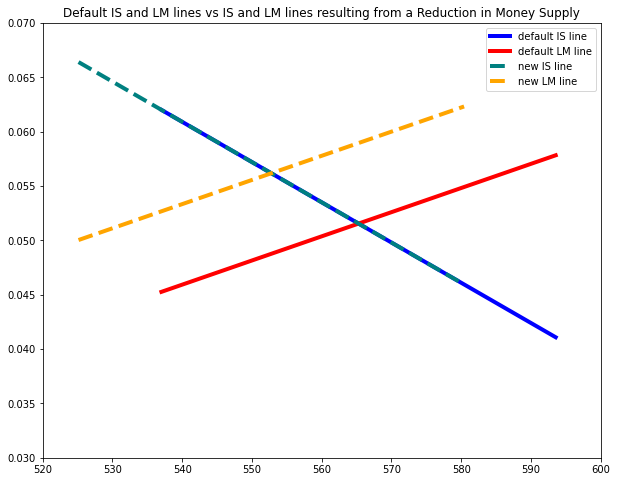

In [274]:
# Plotting the results from the default IS and LM line versus the IS and LM lines resulting
# from a reduction in Money Supply

plt.figure(figsize = (10,8))
l1 = plt.plot(Y, default_IS , 'blue', linewidth=4.0, label='default IS line')
l2 = plt.plot(Y, default_LM,  color='red', linewidth=4.0, label='default LM line')
l1 = plt.plot(new_Y, new_M_IS , 'teal', linewidth=4.0, linestyle='--', label='new IS line')
l2 = plt.plot(new_Y, new_M_LM,  color='orange', linewidth=4.0, linestyle='--', label='new LM line')
plt.xlim((520, 600))
plt.ylim((0.03, 0.07))
plt.legend(loc = 'best')
plt.title('Default IS and LM lines vs IS and LM lines resulting from a Reduction in Money Supply')
plt.show()

In [275]:
df_b

,Change,GDP,Consumption,Investment,Interest Rate
0,Default,565.28,341.83,23.46,5.15
1,Reduction in Gov. Spending,531.51,320.55,30.96,4.40
2,Reduction in Money Supply,552.78,333.95,18.83,5.62


As we can see a reduction in Government spending leads to a decrease in GDP, Consumption and the interest rate but leads to an increase in Investment. Where as a reduction in the Money Supply leads to a decreasea in GDP, consumption and Invesment but an increase in the interest rate. 

In [530]:
!jupyter-nbconvert --to PDFviaHTML Assignment_2.pdf

[NbConvertApp] WARNING | pattern 'Assignment_2.pdf' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout